# MLZOOMCAMP - (California Housing Prices)


In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).


The goal is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
     


### EDA
- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

In [2]:
df = pd.read_csv('master_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [3]:
# Filter the DataFrame to keep only the desired values
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
filtered_df['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [4]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

filtered_df = filtered_df[selected_columns]
df = filtered_df.reset_index(drop=True)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [5]:
# missing value
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,15687.0,35.467307,2.066387,32.6100,33.9400,34.1600,37.3400,41.9500
longitude,15687.0,-119.217442,1.780380,-124.1400,-121.0700,-118.3700,-117.9900,-114.3100
housing_median_age,15687.0,27.188118,12.057128,1.0000,17.0000,27.0000,36.0000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,1441.0000,2118.0000,3172.0000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,295.0000,432.0000,645.0000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,802.0000,1195.0000,1777.0000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,278.0000,406.0000,602.0000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,2.5208,3.4688,4.6862,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,111300.0000,166900.0000,241100.0000,500001.0000



### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [7]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [8]:
n, n_val + n_test + n_train

(15687, 15687)

In [9]:
df_train = df.iloc[ : n_train]
df_val = df.iloc[n_train : n_train+n_val]
df_test = df.iloc[n_train+n_val : ]

In [10]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)    # np.random.shuffle() - returns a shuffled array

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]



In [11]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

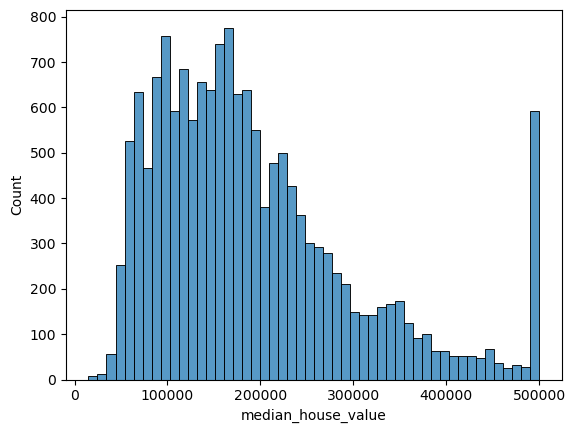

In [13]:
sns.histplot(df['median_house_value'], bins=50);

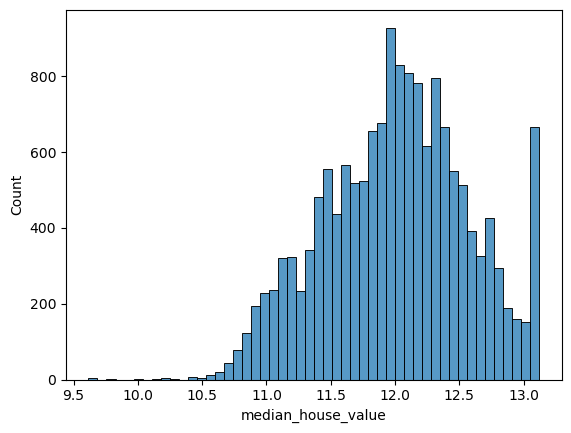

In [14]:
value_logs = np.log1p(df['median_house_value'])

sns.histplot(value_logs, bins=50);

In [15]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [16]:
len(y_train),len(y_val),len(y_test)

(9413, 3137, 3137)

In [17]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [18]:
# Functions 

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) # add a bias term (intercept) to the linear regression model.

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y) # calculates the weights (w_full) for the linear regression model 
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#  list of column names that are considered as features for the linear regression model

base = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [19]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

#### Model_1 with fill 0

In [20]:
print("missing value before = ", df_train1.total_bedrooms.isna().sum())
df_train1.total_bedrooms = df_train1.total_bedrooms.fillna(0)
print("missing value after = ", df_train1.total_bedrooms.isna().sum())

missing value before =  94
missing value after =  0


In [21]:
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

w0_1, y_pred_1

(-9.763249477929213,
 array([11.48901968, 12.14856943, 12.45852739, ..., 12.91332356,
        11.93076692, 12.11614341]))

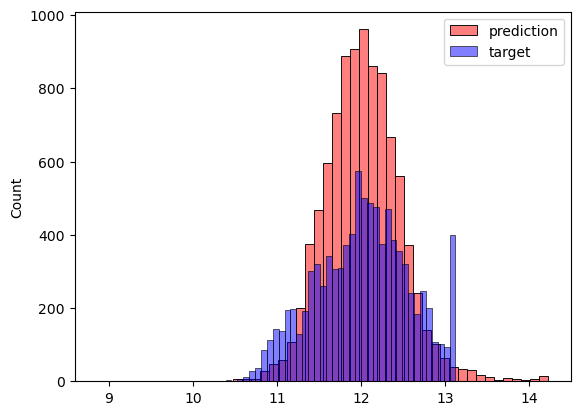

In [22]:
sns.histplot(y_pred_1, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=50)
plt.legend();

In [23]:
round(rmse(y_train, y_pred_1),2)

0.34

In [24]:
X_val = prepare_X(df_val)
y_pred_11 = w0_1 + X_val.dot(w_1)
round(rmse(y_val, y_pred_11),2)

0.34

#### Model_2 with fill with Mean

In [25]:
print("missing value before = ", df_train2.total_bedrooms.isna().sum())
df_train2.total_bedrooms = df_train2.total_bedrooms.fillna(df_train2.total_bedrooms.mean())
print("missing value after = ", df_train2.total_bedrooms.isna().sum())

missing value before =  94
missing value after =  0


In [26]:
X_train2 = df_train2.fillna(df_train2.total_bedrooms.mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

w0_2, y_pred_2

(-9.886133215861097,
 array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
        11.93466055, 12.11281089]))

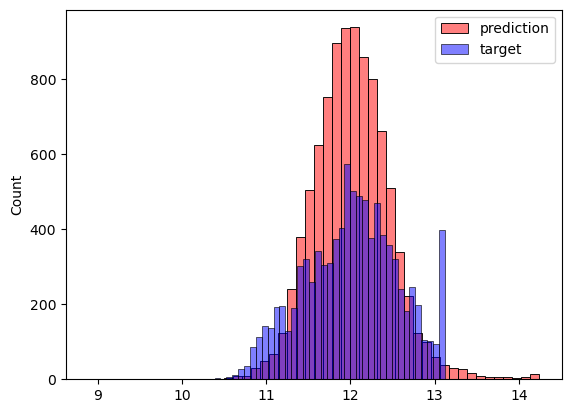

In [27]:
sns.histplot(y_pred_2, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='target', color='blue', alpha=0.5, bins=50)
plt.legend();

In [28]:
round(rmse(y_train, y_pred_2),2)

0.34

In [29]:
X_val = prepare_X(df_val)
y_pred_22 = w0_2 + X_val.dot(w_2)
round(rmse(y_val, y_pred_22),2)

0.34

**Observation the RMSE** is the Same 0.34

### Regularization

In [30]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [31]:
# Define the list of regularization parameters to try
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_values:
    X_train3 = prepare_X(df_train3)
    w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=r)

    X_val_3 = prepare_X(df_val)
    y_pred_3 = w0_3 + X_val_3.dot(w_3)
    score = rmse(y_val, y_pred_3)
    
    print(f"When r={r}: intercept = {w0_3}, RMSE = {score}")

When r=0: intercept = -9.763249477929213, RMSE = 0.3408479034201646
When r=1e-06: intercept = -9.76322883158197, RMSE = 0.340847906183037
When r=0.0001: intercept = -9.761185235939122, RMSE = 0.3408481800532382
When r=0.001: intercept = -9.74264624988528, RMSE = 0.34085069219124453
When r=0.01: intercept = -9.561056193156471, RMSE = 0.3408779300469961
When r=0.1: intercept = -8.058889769818062, RMSE = 0.3412862041994745
When r=1: intercept = -3.1331542785822872, RMSE = 0.34489583276302355
When r=5: intercept = -0.841086797533389, RMSE = 0.3477398070480637
When r=10: intercept = -0.4381172315908744, RMSE = 0.3483149833520889


The RMSE is the lowest when r is 0 (no regularization), making it the best choice in this case for achieving the lowest prediction error on the validation dataset

##### Let's find out how selecting the seed influences our score

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse_scores =[]

# Define the list of seed values
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for s in seed_values:
    
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # fillna with 0
    #df_train = df_train.fillna(0).values
    
    # train 
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    
    # rmse
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),3)
    rmse_scores.append(score)
    
    print('Seed =  {} , Rmse score = {}'.format(s,score))

Seed =  0 , Rmse score = 0.332
Seed =  1 , Rmse score = 0.342
Seed =  2 , Rmse score = 0.344
Seed =  3 , Rmse score = 0.342
Seed =  4 , Rmse score = 0.339
Seed =  5 , Rmse score = 0.341
Seed =  6 , Rmse score = 0.337
Seed =  7 , Rmse score = 0.341
Seed =  8 , Rmse score = 0.336
Seed =  9 , Rmse score = 0.336


In [34]:
rmse_scores

[0.332, 0.342, 0.344, 0.342, 0.339, 0.341, 0.337, 0.341, 0.336, 0.336]

In [35]:
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.003


#### using seed 9

In [36]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

#### Combine train and validation datasets

In [37]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [38]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [39]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.34

In [40]:
house = df_test.iloc[15].to_dict()
house

{'latitude': 33.94,
 'longitude': -117.44,
 'housing_median_age': 32.0,
 'total_rooms': 2349.0,
 'total_bedrooms': 452.0,
 'population': 1479.0,
 'households': 425.0,
 'median_income': 3.9118,
 'median_house_value': 114100.0}

In [41]:
df_small = pd.DataFrame([house])
df_small

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.94,-117.44,32.0,2349.0,452.0,1479.0,425.0,3.9118,114100.0


In [42]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

11.948030088643478

In [43]:
np.expm1(y_pred)

154511.47071175653

In [44]:
np.expm1(y_pred), np.expm1(y_test[15])

(154511.47071175653, 114099.99999999997)